In [3]:
import pandas as pd
import zipfile

zip_path = r"C:\Users\win 10\Downloads\diabetes+130-us+hospitals+for+years+1999-2008.zip"

with zipfile.ZipFile(zip_path, 'r') as z:
    print("Files in ZIP:", z.namelist())  # to see the CSV name
    csv_file = 'diabetic_data.csv'  # replace with actual name in ZIP
    df = pd.read_csv(z.open(csv_file))

print(df.shape)
df.head()                                                                                                                                                                                                                                           

Files in ZIP: ['diabetic_data.csv', 'IDS_mapping.csv']
(101766, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical columns:", num_cols[:10])
print("Categorical columns:", cat_cols[:10])


Numerical columns: ['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient']
Categorical columns: ['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum']


In [22]:
import numpy as np
# Show missing before imputation
print("Missing values BEFORE imputation:\n", df.isnull().sum())

# Numeric imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

df[num_cols] = IterativeImputer(random_state=0).fit_transform(df[num_cols])

# Categorical imputation with medical context
cat_defaults = {
    'race': 'Caucasian',
    'gender': 'Unknown',
    'diag_1': 'Diabetes',
    'diag_2': 'Diabetes',
    'diag_3': 'Diabetes',
    'max_glu_serum': 'Norm',
    'A1Cresult': 'Norm',
    'insulin': 'No'
}

for col in cat_cols:
    df[col].fillna(cat_defaults.get(col, df[col].mode()[0]), inplace=True)

# Show missing after imputation
print("\nMissing values AFTER imputation:\n", df.isnull().sum())
df.replace('?', np.nan, inplace=True)
df.head(5)


Missing values BEFORE imputation:
 encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbu

C:\Users\win 10\AppData\Local\Temp\ipykernel_3028\1781272950.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(cat_defaults.get(col, df[col].mode()[0]), inplace=True)



Missing values AFTER imputation:
 encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbu

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392.0,8222157.0,Caucasian,Female,[0-10),NaN,6.0,25.0,1.0,1.0,...,No,No,No,No,No,No,No,No,No,NO
1,149190.0,55629189.0,Caucasian,Female,[10-20),NaN,1.0,1.0,7.0,3.0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410.0,86047875.0,AfricanAmerican,Female,[20-30),NaN,1.0,1.0,7.0,2.0,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364.0,82442376.0,Caucasian,Male,[30-40),NaN,1.0,1.0,7.0,2.0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680.0,42519267.0,Caucasian,Male,[40-50),NaN,1.0,1.0,7.0,1.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
# Safe target selection to avoid KeyError
if 'readmitted_bin' in df.columns:
    TARGET_COL = 'readmitted_bin'
elif 'readmitted' in df.columns:
    TARGET_COL = 'readmitted'
else:
    raise ValueError("No suitable target column found. Available columns:\n", df.columns)

y = df[TARGET_COL]
X = df.drop(columns=[TARGET_COL])

# Map readmitted to binary
y_bin = y.replace({'>30': 1, '<30': 1, 'NO': 0})


# Check target
print("Target column:", TARGET_COL)
print("y shape:", y.shape)
print("Value counts:\n", y.value_counts())


Target column: readmitted
y shape: (101766,)
Value counts:
 readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64


C:\Users\win 10\AppData\Local\Temp\ipykernel_3028\2257385967.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_bin = y.replace({'>30': 1, '<30': 1, 'NO': 0})


In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('scaler', StandardScaler())])

# Use sparse_output=False instead of sparse=False
cat_pipeline = Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])


In [8]:
from sklearn.model_selection import train_test_split

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y_bin, test_size=0.2, stratify=y_bin, random_state=42
)

print("Shapes after split:")
print("X_train:", X_train_raw.shape)
print("X_test:", X_test_raw.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Shapes after split:
X_train: (81412, 49)
X_test: (20354, 49)
y_train: (81412,)
y_test: (20354,)


In [9]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Ensure numeric and categorical columns exist in X_train_raw
num_cols_train = [col for col in num_cols if col in X_train_raw.columns]
cat_cols_train = [col for col in cat_cols if col in X_train_raw.columns]

# Numeric pipeline
num_pipeline = Pipeline([('scaler', StandardScaler())])

# Categorical pipeline
cat_pipeline = Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

# ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols_train),
    ('cat', cat_pipeline, cat_cols_train)
])

# Apply preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train_raw)
X_test_preprocessed = preprocessor.transform(X_test_raw)

print("X_train_preprocessed shape:", X_train_preprocessed.shape)
print("X_test_preprocessed shape:", X_test_preprocessed.shape)


X_train_preprocessed shape: (81412, 2394)
X_test_preprocessed shape: (20354, 2394)


In [10]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

rf_fs = RandomForestClassifier(class_weight='balanced', n_estimators=200, random_state=42)
rf_fs.fit(X_train_preprocessed, y_train)

importances = rf_fs.feature_importances_
top_idx = np.argsort(importances)[::-1][:20]

X_train_top = X_train_preprocessed[:, top_idx]
X_test_top = X_test_preprocessed[:, top_idx]

print("Top features selected:", len(top_idx))
print("X_train_top shape:", X_train_top.shape)
print("X_test_top shape:", X_test_top.shape)

Top features selected: 20
X_train_top shape: (81412, 20)
X_test_top shape: (20354, 20)


In [11]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_params = {
    'n_estimators':[100,200,300],
    'max_depth':[5,10,20,None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

rf_grid = RandomizedSearchCV(rf, rf_params, n_iter=10, cv=3, scoring='f1', n_jobs=-1, random_state=42)
rf_grid.fit(X_train_top, y_train)
rf_best = rf_grid.best_estimator_
print("Best RF Params:", rf_grid.best_params_)


Best RF Params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}



✅ Model Evaluation Results:
Accuracy: 0.6571

Confusion Matrix:
 [[7351 3622]
 [3358 6023]]

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.67      0.68     10973
           1       0.62      0.64      0.63      9381

    accuracy                           0.66     20354
   macro avg       0.66      0.66      0.66     20354
weighted avg       0.66      0.66      0.66     20354



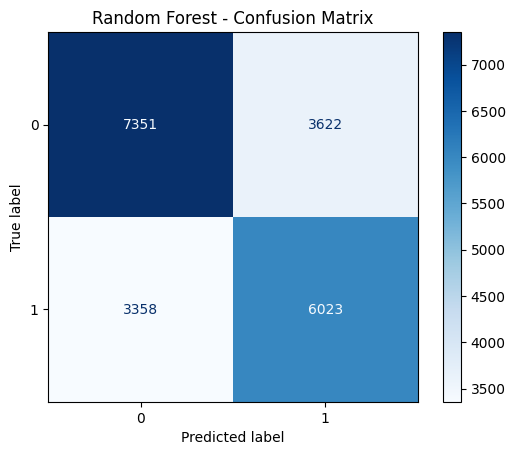

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ✅ Predictions
y_pred = rf_best.predict(X_test_top)

# ✅ Print metrics
print("\n✅ Model Evaluation Results:")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ✅ Confusion Matrix Plot (Matplotlib)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.show()


Brier Score: 0.2161


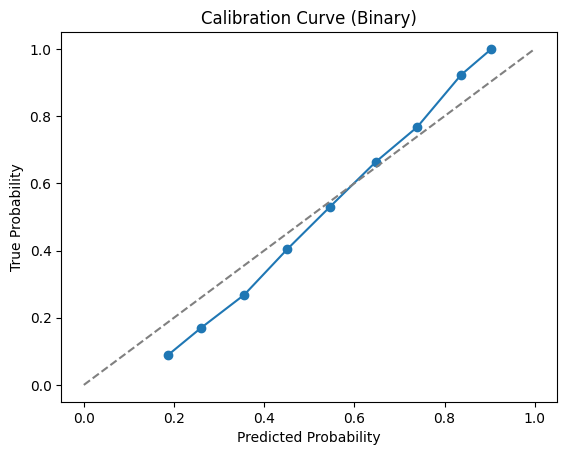

In [13]:
# Convert target to binary: 1 = readmitted (<30 or >30), 0 = not readmitted (NO)
y_train_bin = y_train.replace({'>30': 1, '<30': 1, 'NO': 0})
y_test_bin = y_test.replace({'>30': 1, '<30': 1, 'NO': 0})

from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss
import matplotlib.pyplot as plt

# Predict probabilities again
y_prob = rf_best.predict_proba(X_test_top)[:, 1]

# Compute Brier Score
brier = brier_score_loss(y_test_bin, y_prob)
print("Brier Score:", round(brier, 4))

# Plot calibration curve
prob_true, prob_pred = calibration_curve(y_test_bin, y_prob, n_bins=10)

plt.plot(prob_pred, prob_true, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Calibration Curve (Binary)')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.show()


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', random_state=42)

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(
    rf, rf_params, cv=3, scoring='f1', n_jobs=-1, verbose=1
)
rf_grid.fit(X_train_top, y_train)

rf_best = rf_grid.best_estimator_
print("\n✅ Best Random Forest Parameters:", rf_grid.best_params_)


Fitting 3 folds for each of 48 candidates, totalling 144 fits

✅ Best Random Forest Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [15]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

xgb_grid = GridSearchCV(
    xgb, xgb_params, cv=3, scoring='f1', n_jobs=-1, verbose=1
)
xgb_grid.fit(X_train_top, y_train)  # ← use X_train_top and y_train

xgb_best = xgb_grid.best_estimator_
print("\n✅ Best XGBoost Parameters:", xgb_grid.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


c:\Users\win 10\Desktop\Diabetic dataset\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:41:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



✅ Best XGBoost Parameters: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}



✅ Linear SVM Model Evaluation
Accuracy: 0.6287

Confusion Matrix:
 [[8614 2359]
 [5198 4183]]

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.79      0.70     10973
           1       0.64      0.45      0.53      9381

    accuracy                           0.63     20354
   macro avg       0.63      0.62      0.61     20354
weighted avg       0.63      0.63      0.62     20354



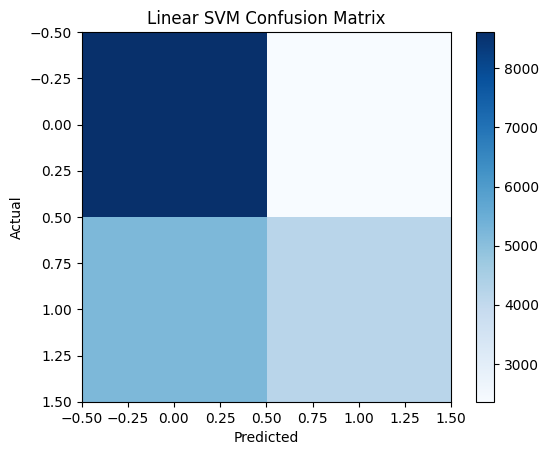

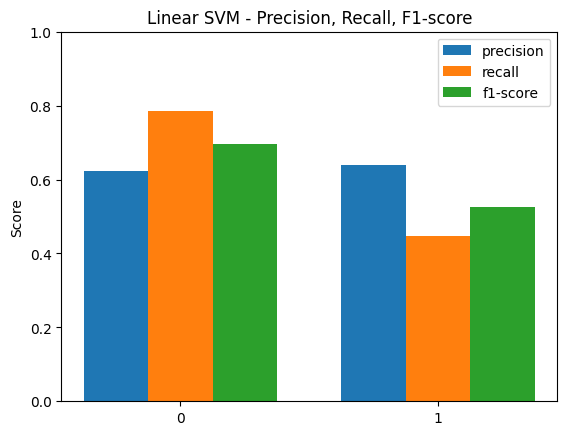

In [16]:
# ✅ Linear SVM Model Training and Evaluation (Fixed version)
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

# 🧠 Ensure feature selection is available; if not, recreate it
try:
    X_train_top, X_test_top
except NameError:
    # Recreate top 20 features from RandomForest
    from sklearn.ensemble import RandomForestClassifier
    import numpy as np

    rf_fs = RandomForestClassifier(class_weight='balanced', n_estimators=200, random_state=42)
    rf_fs.fit(X_train_preprocessed, y_train)

    importances = rf_fs.feature_importances_
    top_idx = np.argsort(importances)[::-1][:20]

    X_train_top = X_train_preprocessed[:, top_idx]
    X_test_top = X_test_preprocessed[:, top_idx]

    print("Top features reselected for SVM:", len(top_idx))

# ⚙️ Train Linear SVM
svm_model = LinearSVC(random_state=42, max_iter=5000)
svm_model.fit(X_train_top, y_train)

# 🔮 Predictions
y_pred_svm = svm_model.predict(X_test_top)

# 📊 Evaluation
print("\n✅ Linear SVM Model Evaluation")
print("Accuracy:", round(accuracy_score(y_test, y_pred_svm), 4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

# 🧩 Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred_svm)
plt.imshow(cm, cmap='Blues')
plt.title("Linear SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()

# 📈 Bar Plot for Precision, Recall, F1-score
report = classification_report(y_test, y_pred_svm, output_dict=True)
classes = list(report.keys())[:-3]  # exclude avg values
metrics = ['precision', 'recall', 'f1-score']

x = np.arange(len(classes))
width = 0.25

for i, m in enumerate(metrics):
    plt.bar(x + i * width, [report[c][m] for c in classes], width, label=m)

plt.xticks(x + width, classes)
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Linear SVM - Precision, Recall, F1-score")
plt.legend()
plt.show()



==== Random Forest (Tuned) ====
              precision    recall  f1-score   support

           0      0.689     0.667     0.678     10973
           1      0.624     0.648     0.636      9381

    accuracy                          0.658     20354
   macro avg      0.657     0.657     0.657     20354
weighted avg      0.659     0.658     0.658     20354



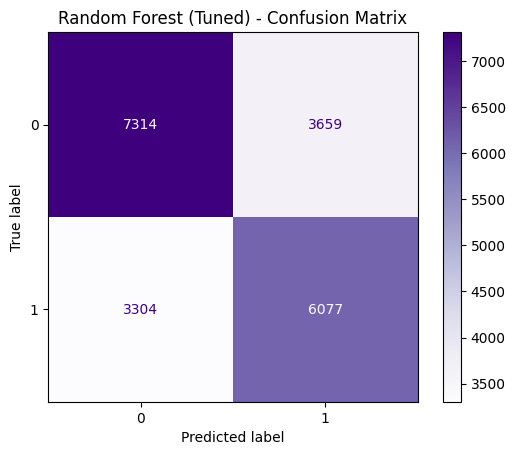


==== XGBoost (Tuned) ====
              precision    recall  f1-score   support

           0      0.684     0.721     0.702     10973
           1      0.652     0.610     0.630      9381

    accuracy                          0.670     20354
   macro avg      0.668     0.665     0.666     20354
weighted avg      0.669     0.670     0.669     20354



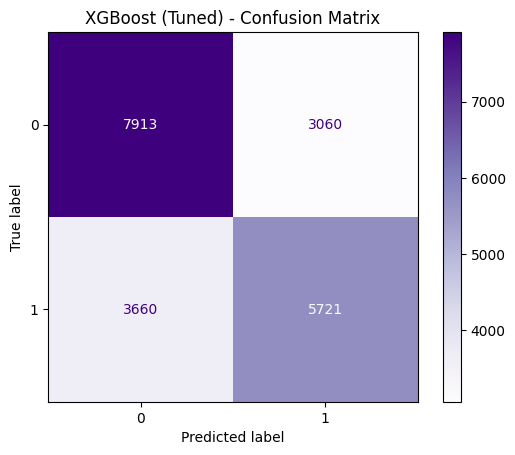


==== Linear SVM (Tuned) ====
              precision    recall  f1-score   support

           0      0.624     0.785     0.695     10973
           1      0.639     0.446     0.525      9381

    accuracy                          0.629     20354
   macro avg      0.632     0.615     0.610     20354
weighted avg      0.631     0.629     0.617     20354



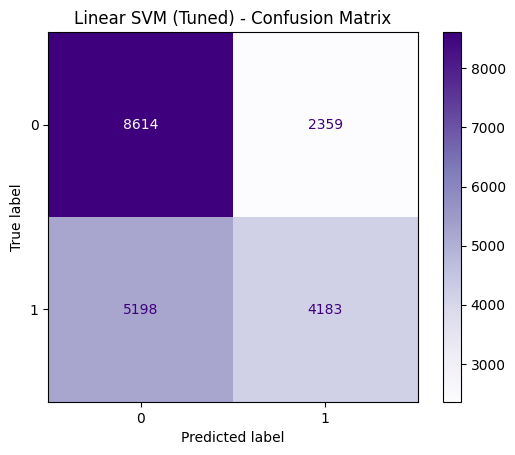

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ✅ Dictionary of trained models
models_tuned = {
    "Random Forest (Tuned)": rf_best,
    "XGBoost (Tuned)": xgb_best,
    "Linear SVM (Tuned)": svm_model
}

# ✅ Evaluate and visualize each model
for name, model in models_tuned.items():
    y_pred = model.predict(X_test_top)   # use top selected features
    print(f"\n==== {name} ====")
    print(classification_report(y_test_bin, y_pred, digits=3))
    
    cm = confusion_matrix(y_test_bin, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Purples')
    plt.title(f'{name} - Confusion Matrix')
    plt.show()